# Capstone 3_Unsupervised learning

Netflix wants to identify similar movies based on movie characteristics.

### data sourse: 
https://www.kaggle.com/rounakbanik/the-movies-dataset

### Content
The main Movies Metadata file contains information on 45,000 movies featured in the Full MovieLens dataset. Features include genres, vote average, vote count, budget, revenue, release dates, runtime, spoken languages, original languages, production countries and companies.

### Goal 
Our goal is to identify similar movies based on movie characteristics.

# Explore/clean the data & feature engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\ojiang1\Desktop\Data Science\Capstone3_Unsupervised learning\moviesmetadata.csv')

C:\Users\ojiang1\Documents\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Dealing missing values & meaningless values

In [5]:
df.isnull().sum()*100/df.isnull().count()

adult                     0.000000
belongs_to_collection    90.115691
budget                    0.000000
genres                    0.000000
homepage                 82.883913
id                        0.000000
imdb_id                   0.037391
original_language         0.024194
original_title            0.000000
overview                  2.098271
popularity                0.010997
poster_path               0.848986
production_companies      0.006598
production_countries      0.006598
release_date              0.191352
revenue                   0.013197
runtime                   0.578454
spoken_languages          0.013197
status                    0.191352
tagline                  55.104914
title                     0.013197
video                     0.013197
vote_average              0.013197
vote_count                0.013197
dtype: float64

## dropping columns that have more than half missing values:
belongs_to_collection, homepage, tagline 

## dropping meaningless columns:
id, imdb_id 

In [6]:
# dropping columns that have more than half missing values:
# belongs_to_collection, homepage and tagline 
# id and imdb_id are meaningless in data analysis/clustering, thus drop

df=df.drop(['belongs_to_collection','homepage','tagline','imdb_id','id'],1)
df.dropna(axis=0,  inplace=True)

df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44058 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 44058 non-null  object 
 1   budget                44058 non-null  object 
 2   genres                44058 non-null  object 
 3   original_language     44058 non-null  object 
 4   original_title        44058 non-null  object 
 5   overview              44058 non-null  object 
 6   popularity            44058 non-null  object 
 7   poster_path           44058 non-null  object 
 8   production_companies  44058 non-null  object 
 9   production_countries  44058 non-null  object 
 10  release_date          44058 non-null  object 
 11  revenue               44058 non-null  float64
 12  runtime               44058 non-null  float64
 13  spoken_languages      44058 non-null  object 
 14  status                44058 non-null  object 
 15  title              

Index(['adult', 'budget', 'genres', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'video', 'vote_average',
       'vote_count'],
      dtype='object')

In [7]:
# see whether data are balanced
df.nunique()

adult                       2
budget                   1203
genres                   4039
original_language          89
original_title          42014
overview                43862
popularity              43044
poster_path             44003
production_companies    22377
production_countries     2360
release_date            17110
revenue                  6844
runtime                   353
spoken_languages         1921
status                      6
title                   40951
video                       2
vote_average               92
vote_count               1820
dtype: int64

In [8]:
#df['adult'].value_counts().plot(kind='bar')
df['adult'].value_counts()
# will delete adult since over 95% of the value is False 
# and thus not useful info in clustering

False    44050
True         8
Name: adult, dtype: int64

In [9]:
# df['status'].value_counts().plot(kind='bar')
df['status'].value_counts()

# df['video'].value_counts().plot(kind='bar')
df['video'].value_counts()

# will delete status and video due to the same reason

False    43975
True        83
Name: video, dtype: int64

## dropping columns that have over 95% values belonging to one category:
adult,status,video

In [10]:
df=df.drop(['adult','status','video'],1)
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44058 entries, 0 to 45465
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                44058 non-null  object 
 1   genres                44058 non-null  object 
 2   original_language     44058 non-null  object 
 3   original_title        44058 non-null  object 
 4   overview              44058 non-null  object 
 5   popularity            44058 non-null  object 
 6   poster_path           44058 non-null  object 
 7   production_companies  44058 non-null  object 
 8   production_countries  44058 non-null  object 
 9   release_date          44058 non-null  object 
 10  revenue               44058 non-null  float64
 11  runtime               44058 non-null  float64
 12  spoken_languages      44058 non-null  object 
 13  title                 44058 non-null  object 
 14  vote_average          44058 non-null  float64
 15  vote_count         

Index(['budget', 'genres', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'title', 'vote_average', 'vote_count'],
      dtype='object')

## Dropping columns that are too diversed, meaning more than 95% of the values are unique:
original_title, overview, popularity, poster_path, production_companies,title

In [11]:
# I also want to drop columns that are too diversed, ie. almost all values are unique
# cuz it becomes pointless in clustering

df.nunique()*100/df.isnull().count()

# will drop original_title, overview, popularity, poster_path, production_companies,title


budget                   2.730492
genres                   9.167461
original_language        0.202006
original_title          95.360661
overview                99.555132
popularity              97.698488
poster_path             99.875165
production_companies    50.789868
production_countries     5.356575
release_date            38.835172
revenue                 15.534069
runtime                  0.801217
spoken_languages         4.360162
title                   92.947932
vote_average             0.208816
vote_count               4.130918
dtype: float64

In [12]:
df=df.drop(['original_title', 'overview', 'popularity', 'poster_path','production_companies','title'],1)
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44058 entries, 0 to 45465
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                44058 non-null  object 
 1   genres                44058 non-null  object 
 2   original_language     44058 non-null  object 
 3   production_countries  44058 non-null  object 
 4   release_date          44058 non-null  object 
 5   revenue               44058 non-null  float64
 6   runtime               44058 non-null  float64
 7   spoken_languages      44058 non-null  object 
 8   vote_average          44058 non-null  float64
 9   vote_count            44058 non-null  float64
dtypes: float64(4), object(6)
memory usage: 3.7+ MB


Index(['budget', 'genres', 'original_language', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages',
       'vote_average', 'vote_count'],
      dtype='object')

## now lets take a look at the data 

In [13]:
df.head()

# now i am gonna transfer some columns: 
# genres,production_countries,spoken_languages, release_date

,budget,genres,original_language,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",en,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",5.7,173.0


##  converting str to list:
genres,production_countries,spoken_languages

In [14]:
# converting genres str to list
import ast 

def convert_to_list(string):
    for row_index, row in df.iterrows():
        df.at[row_index, string] = ast.literal_eval(row[string])

In [15]:
convert_to_list('genres')

# now only extract the genres name

genres1 = []
for row_index, row in df['genres'].iteritems():
    genres = []
    for i in row:
        names = i['name']
        genres.append(names)
    genres1.append(genres)
    
df.insert(0, "genres1", genres1, True)

df.drop(['genres'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44058 entries, 0 to 45465
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres1               44058 non-null  object 
 1   budget                44058 non-null  object 
 2   original_language     44058 non-null  object 
 3   production_countries  44058 non-null  object 
 4   release_date          44058 non-null  object 
 5   revenue               44058 non-null  float64
 6   runtime               44058 non-null  float64
 7   spoken_languages      44058 non-null  object 
 8   vote_average          44058 non-null  float64
 9   vote_count            44058 non-null  float64
dtypes: float64(4), object(6)
memory usage: 4.9+ MB


In [16]:
# do the sanem for production_countries
convert_to_list('production_countries')

prod_country = []
for row_index, row in df['production_countries'].iteritems():
    production_countries = []
    for i in row:
        names = i['name']
        production_countries.append(names)
    prod_country.append(production_countries)
    


df.insert(0, "prod_country", prod_country, True)
df.drop(['production_countries'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44058 entries, 0 to 45465
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   prod_country       44058 non-null  object 
 1   genres1            44058 non-null  object 
 2   budget             44058 non-null  object 
 3   original_language  44058 non-null  object 
 4   release_date       44058 non-null  object 
 5   revenue            44058 non-null  float64
 6   runtime            44058 non-null  float64
 7   spoken_languages   44058 non-null  object 
 8   vote_average       44058 non-null  float64
 9   vote_count         44058 non-null  float64
dtypes: float64(4), object(6)
memory usage: 4.9+ MB


In [17]:
# do the same for spoken_languages

convert_to_list('spoken_languages')

languages = []
for row_index, row in df['spoken_languages'].iteritems():
    spoken_languages = []
    for i in row:
        names = i['name']
        spoken_languages.append(names)
    languages.append(spoken_languages)
    


df.insert(0, "languages", languages, True)
df.drop(['spoken_languages'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44058 entries, 0 to 45465
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   languages          44058 non-null  object 
 1   prod_country       44058 non-null  object 
 2   genres1            44058 non-null  object 
 3   budget             44058 non-null  object 
 4   original_language  44058 non-null  object 
 5   release_date       44058 non-null  object 
 6   revenue            44058 non-null  float64
 7   runtime            44058 non-null  float64
 8   vote_average       44058 non-null  float64
 9   vote_count         44058 non-null  float64
dtypes: float64(4), object(6)
memory usage: 4.9+ MB


## also convert 'release_date'(Y-M-D) to 'year'

In [18]:
# Now Let's convert 'release_date' to 'year'

from datetime import datetime
df.dropna(axis=0,  inplace=True)
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')

df['year']= pd.to_datetime(df['release_date'], format='%Y-%m-%d').dt.year
df.drop(['release_date'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44058 entries, 0 to 45465
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   languages          44058 non-null  object 
 1   prod_country       44058 non-null  object 
 2   genres1            44058 non-null  object 
 3   budget             44058 non-null  object 
 4   original_language  44058 non-null  object 
 5   revenue            44058 non-null  float64
 6   runtime            44058 non-null  float64
 7   vote_average       44058 non-null  float64
 8   vote_count         44058 non-null  float64
 9   year               44058 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 3.7+ MB


In [19]:
# now we have clean data
df.head()

,languages,prod_country,genres1,budget,original_language,revenue,runtime,vote_average,vote_count,year
0,[English],[United States of America],"[Animation, Comedy, Family]",30000000,en,373554033.0,81.0,7.7,5415.0,1995
1,"[English, Français]",[United States of America],"[Adventure, Fantasy, Family]",65000000,en,262797249.0,104.0,6.9,2413.0,1995
2,[English],[United States of America],"[Romance, Comedy]",0,en,0.0,101.0,6.5,92.0,1995
3,[English],[United States of America],"[Comedy, Drama, Romance]",16000000,en,81452156.0,127.0,6.1,34.0,1995
4,[English],[United States of America],[Comedy],0,en,76578911.0,106.0,5.7,173.0,1995


## MultiLabelBinarizer :
languages, prod_country, genres1 - since the data type is list and each list varies in length

## one hot encoding:
original_language

In [20]:
# languages/prod_country/genres1: 
# since the value is a list, instead of dummy transfer, i have to use
# MultiLabelBinarizer

from sklearn.preprocessing import MultiLabelBinarizer

l = df['languages'] 
p_c = df['prod_country'] 
g = df['genres1'] 

mlb = MultiLabelBinarizer()

df1=pd.DataFrame(mlb.fit_transform(l),columns=mlb.classes_, index=df.index)
df2=pd.DataFrame(mlb.fit_transform(p_c),columns=mlb.classes_, index=df.index)
df3=pd.DataFrame(mlb.fit_transform(g),columns=mlb.classes_, index=df.index)

df_new=pd.concat([df,df1,df2],axis=1)


df_new.drop(['languages','prod_country','genres1'],axis=1,inplace=True)


# one hot encoding original_language:
df_new = pd.concat([df_new, pd.get_dummies(df_new["original_language"], prefix="original_language", drop_first=True)], axis=1)
df_new.drop(['original_language'],axis=1,inplace=True)

df_new.info()
df_new.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44058 entries, 0 to 45465
Columns: 329 entries, budget to original_language_zu
dtypes: float64(4), int32(235), int64(1), object(1), uint8(88)
memory usage: 45.5+ MB


,budget,revenue,runtime,vote_average,vote_count,year,,?????,??????,Afrikaans,...,original_language_tl,original_language_tr,original_language_uk,original_language_ur,original_language_uz,original_language_vi,original_language_wo,original_language_xx,original_language_zh,original_language_zu
0,30000000,373554033.0,81.0,7.7,5415.0,1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,65000000,262797249.0,104.0,6.9,2413.0,1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,101.0,6.5,92.0,1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16000000,81452156.0,127.0,6.1,34.0,1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,76578911.0,106.0,5.7,173.0,1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_new.head()

,budget,revenue,runtime,vote_average,vote_count,year,,?????,??????,Afrikaans,...,original_language_tl,original_language_tr,original_language_uk,original_language_ur,original_language_uz,original_language_vi,original_language_wo,original_language_xx,original_language_zh,original_language_zu
0,30000000,373554033.0,81.0,7.7,5415.0,1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,65000000,262797249.0,104.0,6.9,2413.0,1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,101.0,6.5,92.0,1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16000000,81452156.0,127.0,6.1,34.0,1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,76578911.0,106.0,5.7,173.0,1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Standartizing Data for dimensionality reduction 

from sklearn.preprocessing import StandardScaler
df_scaler = StandardScaler().fit_transform(df_new)

df_scaler.shape

(44058, 329)

# Apply dimensionality reduction techniques 

## PCA

In [23]:
# PCA
from sklearn.decomposition import PCA
import time
time_start = time.time()

pca = PCA(n_components=50)
pca_components = pca.fit_transform(df_scaler)


In [25]:
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    pca.explained_variance_ratio_
)

print('Time elapsed: {} seconds'.format(time.time()-time_start))



The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.0123658  0.00999062 0.00955468 0.00927373 0.00904953 0.00884359
 0.00869343 0.00851805 0.00847117 0.00824986 0.00809818 0.00795117
 0.00782611 0.00772446 0.00767976 0.00761332 0.00753029 0.00746224
 0.00740326 0.00736496 0.00731271 0.00721563 0.00720576 0.0071467
 0.00709578 0.00706531 0.00698655 0.00694011 0.00690237 0.00682013
 0.00673396 0.0066865  0.00656636 0.00637963 0.00627981 0.00623237
 0.00621529 0.00614458 0.00602258 0.00601482 0.0059897  0.00591791
 0.00585853 0.00578655 0.00573591 0.00565343 0.00560541 0.00551448
 0.0054547  0.00543492]
Time elapsed: 51.505197525024414 seconds


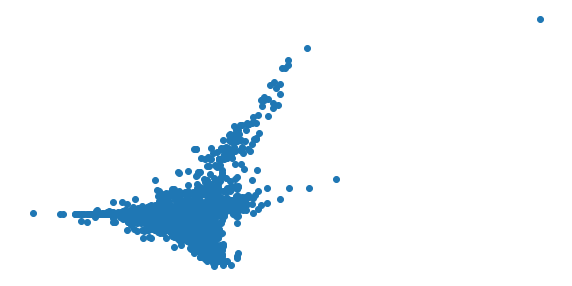

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# the results are not very well even tho the speed is fast

## UMAP

In [27]:
# will not use t-SNE due to large datasets

# UMAP
# try n_neighbors 10, 20, 30, 40, 50, 60, 70, 80, 90, 100
# 90,100 looks the best

import umap

time_start = time.time()

umap_results = umap.UMAP(n_neighbors=100,
                      min_dist=0.3,
                      metric='correlation').fit_transform(df_scaler)


## Try n_neighbors 10, 20, 30, 40, 50, 60, 70, 80, 90, 100
## 90,100 looks the best

Time elapsed: 326.72703194618225 seconds


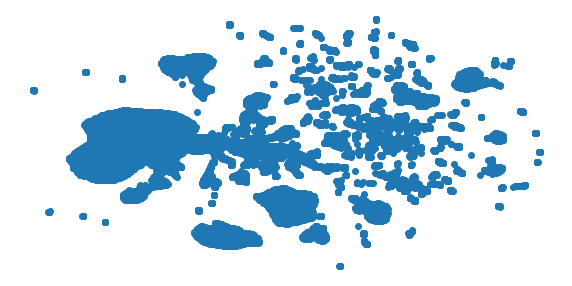

array([-12.847534, -12.820671, -12.81818 , ...,  29.263636,  29.264069,
        29.280247], dtype=float32)

In [28]:
print('Time elapsed: {} seconds'.format(time.time()-time_start))

plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

np.unique(umap_results)


## The reduction result of UMAP is better than PCA, even tho it takes longer to run

# Apply clustering techniques 

## K means

### The elbow method:
choose the point at which the plot starts descending much more slowly.

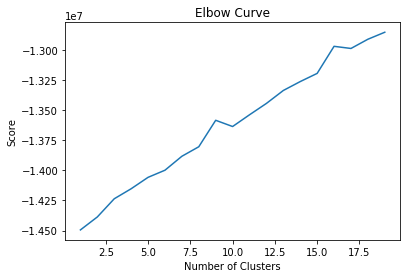

In [187]:
from sklearn.cluster import KMeans

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(df_scaler).score(df_scaler) for i in range(len(kmeans))]

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


# there isn't really a clear inflection point.


In [30]:
# use MinMaxScaler instead

from sklearn import preprocessing

X_mm = preprocessing.MinMaxScaler().fit_transform(df_new)
X_mm.shape

(44058, 329)

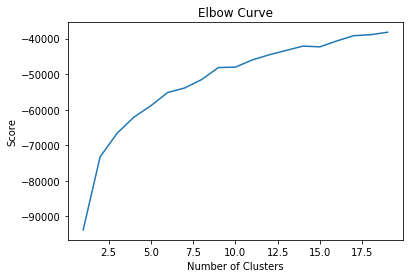

In [192]:
score = [kmeans[i].fit(X_mm).score(X_mm) for i in range(len(kmeans))]

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### we have a better elbow curve here
### we will try Silhouette Method for 2-10 clusters

### The Silhouette Method
The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. 


For n_clusters=2, The Silhouette Coefficient is 0.3209664638649469


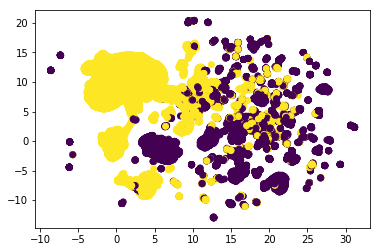

For n_clusters=3, The Silhouette Coefficient is 0.2584544006920885


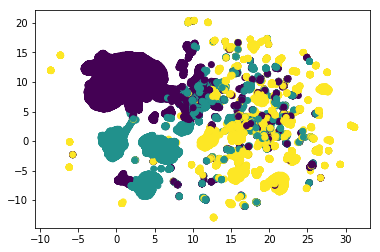

For n_clusters=4, The Silhouette Coefficient is 0.27311354872170074


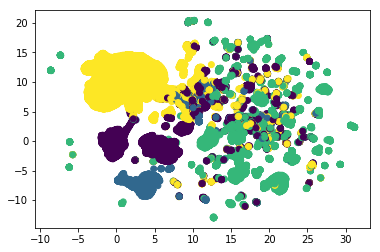

For n_clusters=5, The Silhouette Coefficient is 0.310401732100693


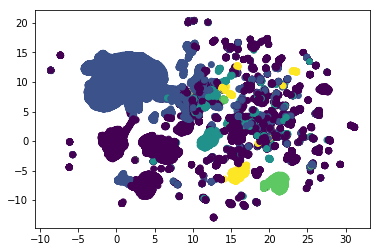

For n_clusters=6, The Silhouette Coefficient is 0.316202746717802


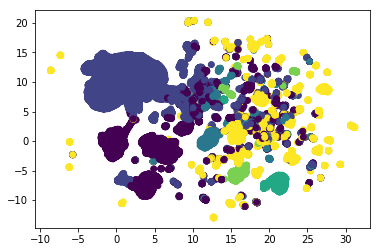

For n_clusters=7, The Silhouette Coefficient is 0.3208804663660466


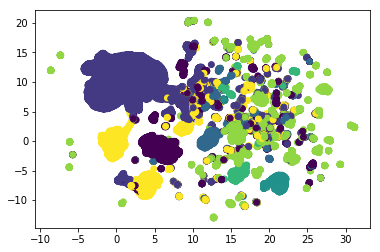

For n_clusters=8, The Silhouette Coefficient is 0.32795514440033197


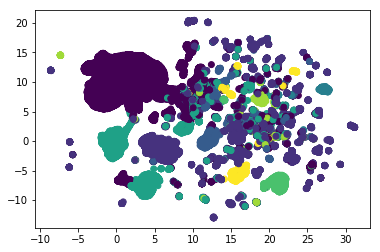

For n_clusters=9, The Silhouette Coefficient is 0.3462600417204747


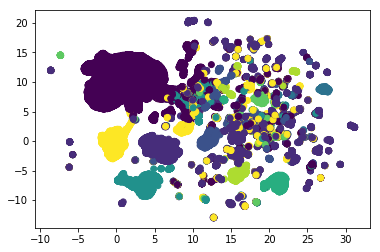

In [212]:
# The Silhouette Method

from sklearn import metrics

for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster,random_state=123).fit(X_mm)
    y_pred = KMeans(n_clusters=n_cluster,random_state=123).fit_predict(X_mm)
    label = kmeans.labels_
    sil_coeff = metrics.silhouette_score(X_mm, y_pred, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    plt.scatter( umap_results[:, 0], umap_results[:, 1], c=y_pred)
    plt.show()

We'll go with n_clusters=9, The Silhouette Coefficient is 0.34

In [213]:
k_means = KMeans(n_clusters=9, random_state=123)
k_means.fit(X_mm)
clusters = k_means.predict(X_mm)
clusters

array([0, 0, 0, ..., 0, 1, 4])

In [214]:
# k_means.labels_

array([0, 0, 0, ..., 0, 1, 4])

In [215]:
# lets take a look at the clusters

df['cluster']=clusters
df['cluster'].value_counts()


0    19744
1     8897
8     4867
4     3929
2     2402
5     1427
7     1366
6      956
3      470
Name: cluster, dtype: int64

from the clusters i see an imbalanced data cluster, but we ll explore this later

## Hierarchical clustering  

9min 9s ± 48.4 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
[0 0 0 ... 0 0 0]


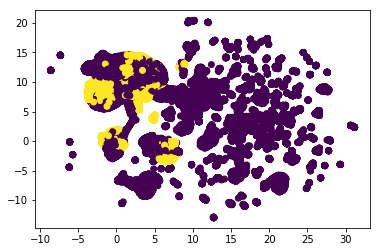

The silhoutte score is: -0.3329411456998018


In [207]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=2)
%timeit agg_cluster.fit(df_scaler)

clusters = agg_cluster.fit_predict(df_scaler)

print(clusters)

plt.scatter(umap_results[:,0], umap_results[:,1], c=clusters)
plt.show()

print("The silhoutte score is: {}"
      .format(metrics.silhouette_score(df_scaler, clusters, metric='euclidean')))

## DBCAN

17min 34s ± 17.2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


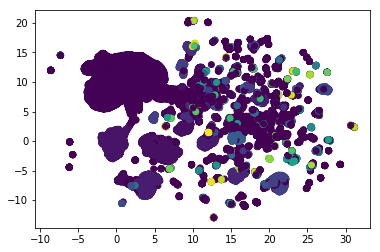

The silhoutte score is: 0.10891422043216759


array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164], dtype=int64)

In [209]:
from sklearn.cluster import DBSCAN

dbscan_cluster = DBSCAN(eps=1, min_samples=10)

dbscan_cluster.fit(df_scaler)

clusters = dbscan_cluster.fit_predict(df_scaler)

plt.scatter(umap_results[:,0], umap_results[:,1], c=clusters)
plt.show()

print("The silhoutte score is: {}"
      .format(metrics.silhouette_score(df_scaler, clusters, metric='euclidean')))

np.unique(clusters)

## GMM

7.79 s ± 177 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


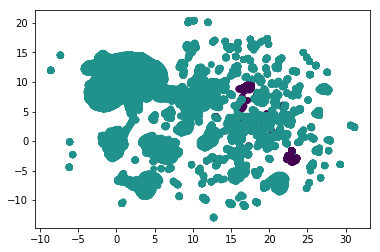

The silhoutte score is: 0.21438209500547453


array([0, 1, 2], dtype=int64)

In [210]:
from sklearn.mixture import GaussianMixture

gmm_cluster = GaussianMixture(n_components=3, random_state=123)

gmm_cluster.fit(df_scaler)

clusters = gmm_cluster.fit_predict(df_scaler)


plt.scatter(umap_results[:,0], umap_results[:,1], c=clusters)
plt.show()

print("The silhoutte score is: {}"
      .format(metrics.silhouette_score(df_scaler, clusters, metric='euclidean')))

np.unique(clusters)

K means is the best performer:
1. fastest speed
2. highest silhoutte score
3. has the most clear graph for different clusters


# Explore Clusters

In [31]:
# re-run the K-means n=9 to rest the cluster number and info

from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=9, random_state=123)
k_means.fit(X_mm)
clusters = k_means.predict(X_mm)
clusters

df['cluster']=clusters
df['cluster'].value_counts()

#df.head()
#df.info()

0    19744
1     8897
8     4867
4     3929
2     2402
5     1427
7     1366
6      956
3      470
Name: cluster, dtype: int64

In [31]:
df.columns #11

Index(['languages', 'prod_country', 'genres1', 'budget', 'original_language',
       'revenue', 'runtime', 'vote_average', 'vote_count', 'year', 'cluster'],
      dtype='object')

In [63]:
#df.groupby(['cluster']).count()
type(df.budget[1])

str

In [47]:
# budget: change str to int --> budget1

df["budget1"]=pd.to_numeric(df["budget"])
type(df.budget1[1])

df.drop(['budget'],axis=1, inplace=True)


In [48]:
df.columns

Index(['languages', 'prod_country', 'genres1', 'original_language', 'revenue',
       'runtime', 'vote_average', 'vote_count', 'year', 'cluster', 'budget1'],
      dtype='object')

In [32]:
# explore numerial columns 

num=['revenue', 'runtime', 'vote_average', 'vote_count', 'year','budget1']


In [33]:
df.groupby(['cluster']).mean().sort_values(by=['revenue'])
# cluster0 has the highest revenue
# cluster4 has the 2nd highest revenue

,revenue,runtime,vote_average,vote_count,year
cluster,,,,,
7,4.822009e+05,97.379941,5.570864,36.217423,1980.904100
6,8.348257e+05,100.047071,6.114644,30.543933,1991.234310
1,1.060271e+06,92.634146,5.505238,14.051253,1996.703608
2,1.187365e+06,96.105745,6.199792,52.787261,1990.114488
8,1.513540e+06,93.599548,5.464619,31.555373,2001.830080
3,2.066240e+06,112.836170,6.561915,43.963830,2008.131915
5,2.602716e+06,99.498248,6.222144,43.377015,1991.416258
4,1.863328e+07,101.775515,6.050725,195.819801,1991.677017
0,2.079070e+07,94.602056,5.586907,184.913543,1987.764536


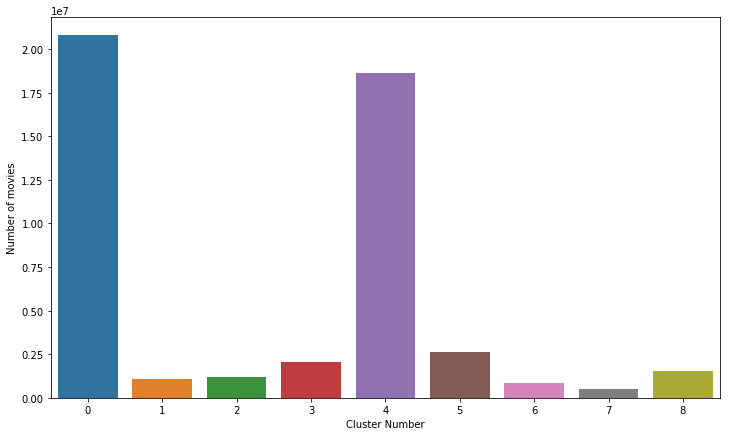

In [40]:
import seaborn as sns

plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,9,1),y=df.groupby(['cluster']).mean()['revenue'])
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [37]:
df.groupby(['cluster']).mean().sort_values(by=['runtime'])
# cluster3 has the longest runtime
# while the rest has similar runtime

,revenue,runtime,vote_average,vote_count,year
cluster,,,,,
1,1.060271e+06,92.634146,5.505238,14.051253,1996.703608
8,1.513540e+06,93.599548,5.464619,31.555373,2001.830080
0,2.079070e+07,94.602056,5.586907,184.913543,1987.764536
2,1.187365e+06,96.105745,6.199792,52.787261,1990.114488
7,4.822009e+05,97.379941,5.570864,36.217423,1980.904100
5,2.602716e+06,99.498248,6.222144,43.377015,1991.416258
6,8.348257e+05,100.047071,6.114644,30.543933,1991.234310
4,1.863328e+07,101.775515,6.050725,195.819801,1991.677017
3,2.066240e+06,112.836170,6.561915,43.963830,2008.131915


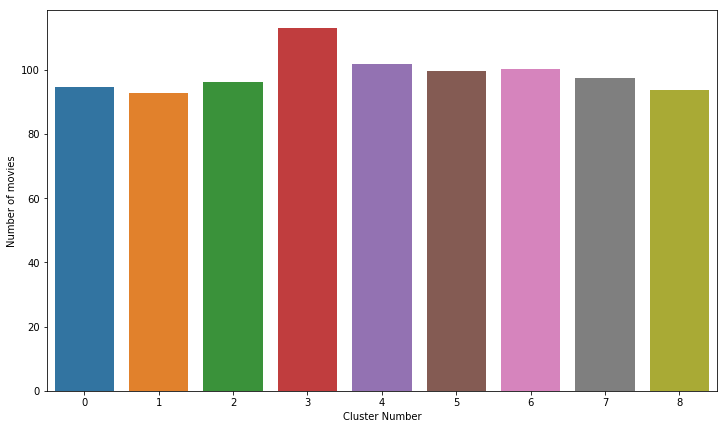

In [41]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,9,1),y=df.groupby(['cluster']).mean()['runtime'])
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [79]:
df.groupby(['cluster']).mean().sort_values(by=['vote_average'])
# cluster3 has the most vote avg

,revenue,runtime,vote_average,vote_count,year,budget1
cluster,,,,,,
8,1.513540e+06,93.599548,5.464619,31.555373,2001.830080,1.207319e+06
1,1.060271e+06,92.634146,5.505238,14.051253,1996.703608,5.240746e+05
7,4.822009e+05,97.379941,5.570864,36.217423,1980.904100,3.232650e+05
0,2.079070e+07,94.602056,5.586907,184.913543,1987.764536,7.599510e+06
4,1.863328e+07,101.775515,6.050725,195.819801,1991.677017,6.640723e+06
6,8.348257e+05,100.047071,6.114644,30.543933,1991.234310,6.687928e+05
2,1.187365e+06,96.105745,6.199792,52.787261,1990.114488,1.131543e+06
5,2.602716e+06,99.498248,6.222144,43.377015,1991.416258,6.776144e+05
3,2.066240e+06,112.836170,6.561915,43.963830,2008.131915,9.014995e+05


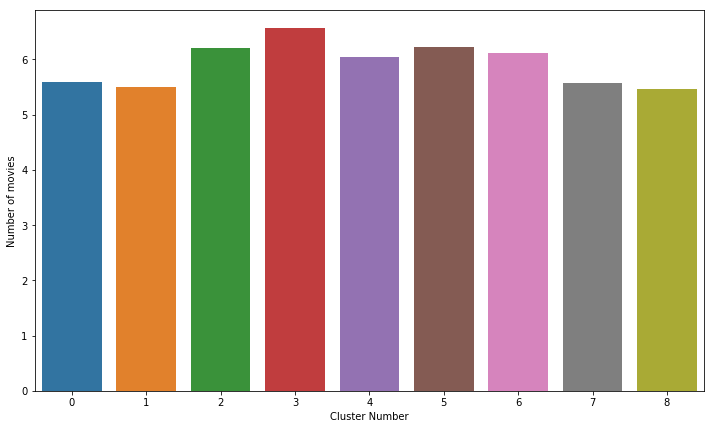

In [42]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,9,1),y=df.groupby(['cluster']).mean()['vote_average'])
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [80]:
df.groupby(['cluster']).mean().sort_values(by=['vote_count'])
# cluster4 has the most vote count
# cluster0 has the 2nd highest vote count

,revenue,runtime,vote_average,vote_count,year,budget1
cluster,,,,,,
1,1.060271e+06,92.634146,5.505238,14.051253,1996.703608,5.240746e+05
6,8.348257e+05,100.047071,6.114644,30.543933,1991.234310,6.687928e+05
8,1.513540e+06,93.599548,5.464619,31.555373,2001.830080,1.207319e+06
7,4.822009e+05,97.379941,5.570864,36.217423,1980.904100,3.232650e+05
5,2.602716e+06,99.498248,6.222144,43.377015,1991.416258,6.776144e+05
3,2.066240e+06,112.836170,6.561915,43.963830,2008.131915,9.014995e+05
2,1.187365e+06,96.105745,6.199792,52.787261,1990.114488,1.131543e+06
0,2.079070e+07,94.602056,5.586907,184.913543,1987.764536,7.599510e+06
4,1.863328e+07,101.775515,6.050725,195.819801,1991.677017,6.640723e+06


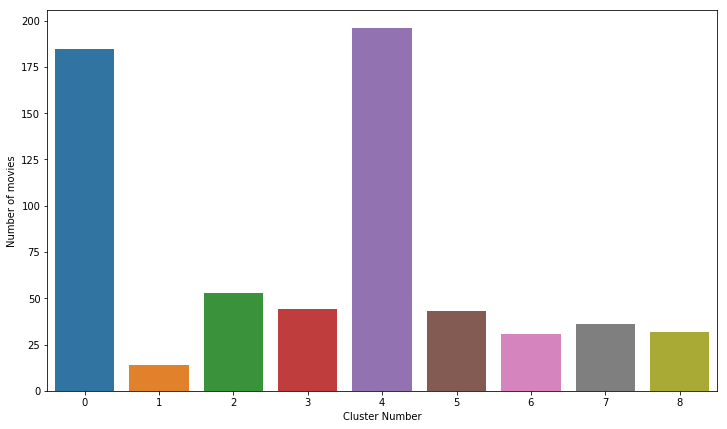

In [44]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,9,1),y=df.groupby(['cluster']).mean()['vote_count'])
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [81]:
df.groupby(['cluster']).mean().sort_values(by=['year'])
# cluster3 has the most recent movies
# the rest has close enough release year

,revenue,runtime,vote_average,vote_count,year,budget1
cluster,,,,,,
7,4.822009e+05,97.379941,5.570864,36.217423,1980.904100,3.232650e+05
0,2.079070e+07,94.602056,5.586907,184.913543,1987.764536,7.599510e+06
2,1.187365e+06,96.105745,6.199792,52.787261,1990.114488,1.131543e+06
6,8.348257e+05,100.047071,6.114644,30.543933,1991.234310,6.687928e+05
5,2.602716e+06,99.498248,6.222144,43.377015,1991.416258,6.776144e+05
4,1.863328e+07,101.775515,6.050725,195.819801,1991.677017,6.640723e+06
1,1.060271e+06,92.634146,5.505238,14.051253,1996.703608,5.240746e+05
8,1.513540e+06,93.599548,5.464619,31.555373,2001.830080,1.207319e+06
3,2.066240e+06,112.836170,6.561915,43.963830,2008.131915,9.014995e+05


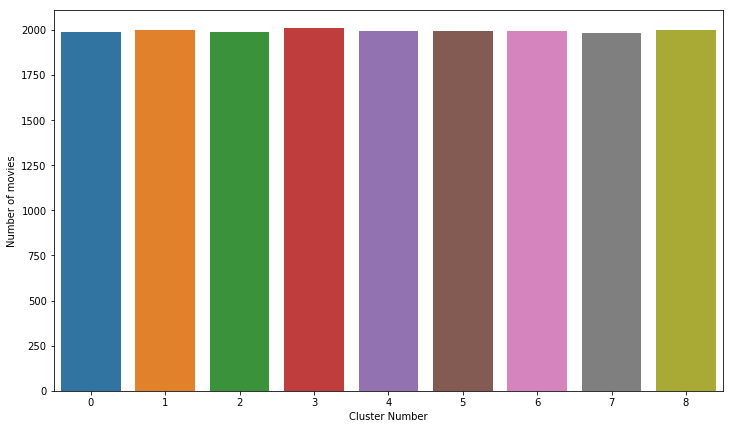

In [45]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,9,1),y=df.groupby(['cluster']).mean()['year'])
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [82]:
df.groupby(['cluster']).mean().sort_values(by=['budget1'])
# cluster 0 has the most budget
# cluster 4 has the 2nd highest budget

,revenue,runtime,vote_average,vote_count,year,budget1
cluster,,,,,,
7,4.822009e+05,97.379941,5.570864,36.217423,1980.904100,3.232650e+05
1,1.060271e+06,92.634146,5.505238,14.051253,1996.703608,5.240746e+05
6,8.348257e+05,100.047071,6.114644,30.543933,1991.234310,6.687928e+05
5,2.602716e+06,99.498248,6.222144,43.377015,1991.416258,6.776144e+05
3,2.066240e+06,112.836170,6.561915,43.963830,2008.131915,9.014995e+05
2,1.187365e+06,96.105745,6.199792,52.787261,1990.114488,1.131543e+06
8,1.513540e+06,93.599548,5.464619,31.555373,2001.830080,1.207319e+06
4,1.863328e+07,101.775515,6.050725,195.819801,1991.677017,6.640723e+06
0,2.079070e+07,94.602056,5.586907,184.913543,1987.764536,7.599510e+06


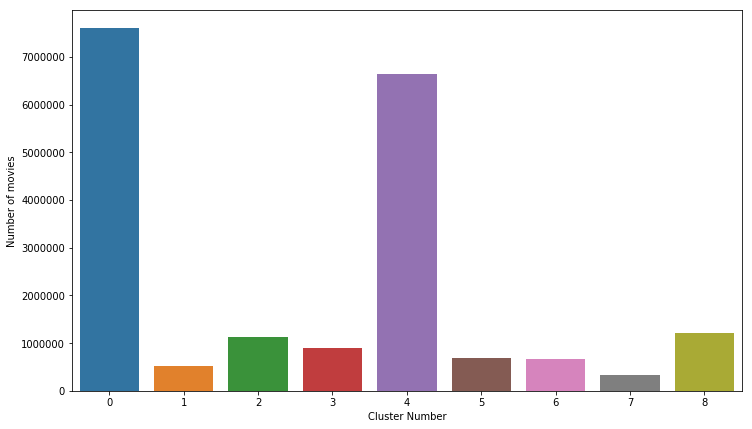

In [49]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,9,1),y=df.groupby(['cluster']).mean()['budget1'])
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [50]:
# explore non numerical columns 

non_num=['languages','original_language', 'prod_country', 'genres1']


In [94]:
df[df['cluster'] == 0]['languages'].value_counts()
#English
df[df['cluster'] == 0]['original_language'].value_counts()
# en
df[df['cluster'] == 0]['prod_country'].value_counts()
# USA
df[df['cluster'] == 0]['genres1'].value_counts()
# drama & comedy

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Drama]                                                  1666
[Comedy]                                                 1585
[Documentary]                                             981
[Drama, Romance]                                          581
[Comedy, Romance]                                         576
                                                         ... 
[Mystery, Drama, Thriller, Crime]                           1
[Horror, Fantasy, Thriller, Science Fiction, Mystery]       1
[Drama, Horror, Mystery, Science Fiction]                   1
[Drama, Comedy, Thriller, Music, Romance]                   1
[Mystery, Drama, Thriller, Horror]                          1
Name: genres1, Length: 2533, dtype: int64

In [98]:
df[df['cluster'] == 1]['languages'].value_counts()
# spanish
df[df['cluster'] == 1]['original_language'].value_counts()
# en
df[df['cluster'] == 1]['prod_country'].value_counts()
# Russia
df[df['cluster'] == 1]['genres1'].value_counts()
# drama 

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Drama]                         1299
[]                              1219
[Documentary]                    657
[Comedy]                         619
[Comedy, Drama]                  240
                                ... 
[Drama, Romance, Music]            1
[Fantasy, Mystery]                 1
[Drama, Horror, Fantasy]           1
[Foreign, Family]                  1
[Animation, Fantasy, Family]       1
Name: genres1, Length: 1150, dtype: int64

In [102]:
df[df['cluster'] == 2]['languages'].value_counts()
# French
df[df['cluster'] == 2]['original_language'].value_counts()
# french
df[df['cluster'] == 2]['prod_country'].value_counts()
# France
df[df['cluster'] == 2]['genres1'].value_counts()
# drama 

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Drama]                                                               454
[Comedy]                                                              301
[Drama, Romance]                                                      127
[Comedy, Drama]                                                        93
[Documentary]                                                          82
                                                                     ... 
[Horror, Thriller, Romance]                                             1
[Family, Adventure, Comedy, Fantasy]                                    1
[Thriller, Adventure, Animation, Comedy, Fantasy, Science Fiction]      1
[Horror, Thriller, Romance, Foreign]                                    1
[History, Comedy]                                                       1
Name: genres1, Length: 447, dtype: int64

In [106]:
df[df['cluster'] == 3]['languages'].value_counts()
# Korean
df[df['cluster'] == 3]['original_language'].value_counts()
# Korean
df[df['cluster'] == 3]['prod_country'].value_counts()
# South Korea
df[df['cluster'] == 3]['genres1'].value_counts()
# drama 

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Drama]                                         56
[]                                              14
[Drama, Romance]                                12
[Horror]                                        12
[Action, Comedy]                                11
                                                ..
[Action, Adventure, Drama, Foreign, History]     1
[History, Drama, War, Action]                    1
[Drama, Thriller, Crime]                         1
[Thriller, Mystery, Foreign]                     1
[History, Drama]                                 1
Name: genres1, Length: 213, dtype: int64

In [110]:
df[df['cluster'] == 4]['languages'].value_counts()
# english
df[df['cluster'] == 4]['original_language'].value_counts()
# en
df[df['cluster'] == 4]['prod_country'].value_counts()
# UK
df[df['cluster'] == 4]['genres1'].value_counts()
# drama 

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Drama]                                        392
[Comedy]                                       228
[Documentary]                                  190
[Drama, Romance]                               152
[Horror]                                       109
                                              ... 
[Science Fiction, Comedy, Thriller, Horror]      1
[Romance, Adventure, Action, History]            1
[Family, Fantasy, Science Fiction]               1
[Crime, Comedy, Romance]                         1
[Crime, Drama, Thriller, TV Movie]               1
Name: genres1, Length: 975, dtype: int64

In [114]:
df[df['cluster'] == 5]['languages'].value_counts()
# japanese
df[df['cluster'] == 5]['original_language'].value_counts()
# japanese
df[df['cluster'] == 5]['prod_country'].value_counts()
# japan
df[df['cluster'] == 5]['genres1'].value_counts()
# drama 

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Drama]                                          184
[]                                                65
[Horror]                                          41
[Drama, Romance]                                  31
[Comedy]                                          28
                                                ... 
[Adventure, Drama, Romance]                        1
[Drama, Action, Romance]                           1
[Fantasy, Drama, Action, Thriller, Animation]      1
[Animation, Fantasy, Adventure]                    1
[Drama, Crime, Action, Thriller]                   1
Name: genres1, Length: 556, dtype: int64

In [118]:
df[df['cluster'] == 6]['languages'].value_counts()
# Deutsch
df[df['cluster'] == 6]['original_language'].value_counts()
# Deutsch
df[df['cluster'] == 6]['prod_country'].value_counts()
# Germany
df[df['cluster'] == 6]['genres1'].value_counts()
# drama 

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Drama]                       203
[Comedy]                      104
[Documentary]                  54
[Comedy, Drama]                37
[]                             27
                             ... 
[Western]                       1
[Drama, Crime, Thriller]        1
[Fantasy, Horror, Mystery]      1
[Crime, Science Fiction]        1
[Mystery, Horror, History]      1
Name: genres1, Length: 239, dtype: int64

In [122]:
df[df['cluster'] == 7]['languages'].value_counts()
# Italian
df[df['cluster'] == 7]['original_language'].value_counts()
# Italian
df[df['cluster'] == 7]['prod_country'].value_counts()
# Italy
df[df['cluster'] == 7]['genres1'].value_counts()
# Comedy/drama 

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Comedy]                                         188
[Drama]                                          179
[]                                                77
[Western]                                         71
[Horror]                                          48
                                                ... 
[Drama, Thriller, Foreign]                         1
[Comedy, Adventure, Science Fiction, Fantasy]      1
[Romance, Drama, Horror, Mystery]                  1
[Crime, Drama, Foreign, History, Thriller]         1
[War, Adventure, History, Drama, Romance]          1
Name: genres1, Length: 319, dtype: int64

In [126]:
df[df['cluster'] == 8]['languages'].value_counts()
# english
df[df['cluster'] == 8]['original_language'].value_counts()
# en
df[df['cluster'] == 8]['prod_country'].value_counts()
# Canada
df[df['cluster'] == 8]['genres1'].value_counts()
# Documentary 

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Documentary]                             608
[Drama]                                   452
[Comedy]                                  292
[]                                        261
[Drama, Romance]                          125
                                         ... 
[Crime, Drama, Thriller, TV Movie]          1
[Adventure, Science Fiction]                1
[TV Movie, Adventure, Comedy, Family]       1
[Animation, Comedy, Adventure, Family]      1
[Comedy, Drama, TV Movie]                   1
Name: genres1, Length: 986, dtype: int64

# Conclusion for 9 clusters

Cluster 0 features:
- spoken language: English
- original language: English
- made in USA
- drama & comedy
- has the most budget
- has the highest revenue
- has the 2nd highest vote count

Cluster 1 features:
- spoken language: Spanish
- original language: English
- made in Russia
- drama 
- has the lowest vote count
- has the shortest runtime

Cluster 2 features:
- spoken language: French
- original language: French
- made in France
- drama 
- 3rd best vote avg



Cluster 3 features:

- spoken language: Korean
- original language: Korean
- made in South Korea
- drama
- has the longest runtime
- has the best vote avg
- has the most recent movies

Cluster 4 features:

- spoken language: English
- original language: English
- made in UK
- drama
- has the most vote count
- has the 2nd highest revenue 
- has the 2nd highest budget

Cluster 5 features:
- spoken language: Japanese
- original language: Japanese
- made in Japan
- drama 
- has 2nd best vote avg

Cluster 6 features:
- spoken language: Deutsch
- original language: Deutsch
- made in Germany
- drama 
- has the 2nd lowest revenue
- has the 2nd lowest vote count

Cluster 7 features:
- spoken language: Italian
- original language: Italian
- made in Italy
- Comedy & drama 
- has the smallest budget
- has the lowest revenue
- has the older movies:1980s

Cluster 8 features:
- spoken language: English
- original language: English
- made in Canada
- Documentary
- has the lowest vote avg

# Next step:
1. we can model sub clusters to have more balanced clusteres since the current 9 clusters are not well balanced
2. we can use the current info to predict movie revenue/budget/popularity
3. we can use the info to build movie recommendation system: users who like movie A would also like movie BCD, based on your movie history we recommend movie EFG, etc.

# The End